In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv")

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
568,8.13,4.0,0
185,7.30,31.0,0
278,5.23,17.0,1
627,6.31,30.0,1
369,6.69,36.0,1


A data point which is very different from the data, this is called outliers.

When should you remove outliers?   

Ans = when outliers are pure outliers then we must remove outliers. It depends on the problem statement and the required.

Effect of Outliers :- 
    Certain ML algorithms are effected by outliers - 
    1. Logistic Regression   2. Linear Regression  3. Ada Boost Regression   4. DeepLearning
    
    Tree based algorithms are not effected by outliers

# Treating Outliers

1. Removing Them
2. Capping - Assigning a threshold value of lower side and higher side.
3. Consider all the outliers as Missing Values
4. Discretisation

# Detecting Outliers

1. Using Normal distribution  (applicable if data is close to noramlly distributed)
2. Skewed DATA (use box plot) (Q1 - 1.5IQR, Q3 + IQR)
3. Other Methods

we will learn
1. Z_score treatment
2. IQR based filtering
3. percentile based filtering
4. WinserBaton based treatment

## Z-Score Method 

Xi = (X - mean)/standard_deviation

1. trimming - removing all the outliers (sometimes if data  haas more outliers then it will be difficult)
2. capping - fixing the max and min for the outliers

C:\Users\baibh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\baibh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


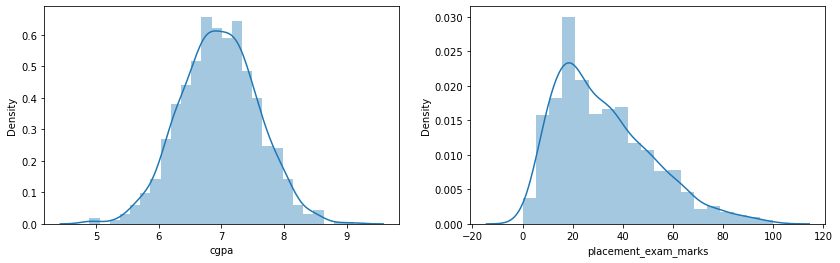

In [8]:
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)

sns.distplot(df['cgpa'])
plt.subplot(1, 2, 2)
sns.distplot(df['placement_exam_marks'])

plt.show()

cgpa is normally distributed where as marks are skewed

In [10]:
print('the mean of cgpa', df['cgpa'].mean())
print('the Std of cgpa', df['cgpa'].std())
print('the Min of cgpa', df['cgpa'].min())
print('the Max of cgpa', df['cgpa'].max())

the mean of cgpa 6.96124000000001
the Std of cgpa 0.6158978751323894
the Min of cgpa 4.89
the Max of cgpa 9.12


In [12]:
#finnding the boundary values 
max = df['cgpa'].mean() + 3*df['cgpa'].std()
min = df['cgpa'].mean() - 3*df['cgpa'].std()

In [15]:
print('The highet value for cgpa is', max)
print('The minimum value for cgpa is', min)

The highet value for cgpa is 8.808933625397177
The minimum value for cgpa is 5.113546374602842


In [31]:
df[(df['cgpa'] > max) | (df['cgpa']< min)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming 

In [34]:
new_df = df[(df['cgpa']< max) & (df['cgpa']> min)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [35]:
# calculating the Z_score

df['cgpa_score'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [36]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [38]:
df[(df['cgpa_score']< -3) | (df['cgpa_score']> 3)]

,cgpa,placement_exam_marks,placed,cgpa_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [39]:
new_df2 = df[(df['cgpa_score'] < 3)&(df['cgpa_score'] >  -3)]

In [42]:
new_df2.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_score
462,6.71,9.0,1,-0.407925
687,6.81,23.0,0,-0.245560
757,6.84,15.0,0,-0.196851
494,6.83,51.0,0,-0.213087
34,8.15,9.0,0,1.930125


## Cappinng 

In [46]:
df['cgpa'] = np.where(df['cgpa'] > max, max, np.where(df['cgpa']< min, min, df['cgpa']))

<AxesSubplot:ylabel='Density'>

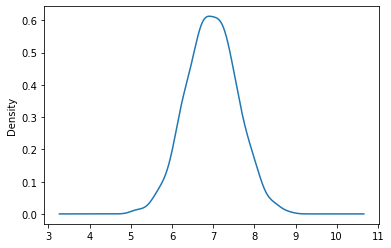

In [48]:
df['cgpa'].plot(kind = 'kde')

In [49]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64